# ***Packaging***

In [1053]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***1. Data loading, data type correction, and removal of irrelevant variables***

In [ ]:
#Loading data as df (dataframe)
df = pd.read_excel('Portfolio Puma MGM.xlsx', sheet_name=0)
df.head(2)

,Case Name,Account Name,State,Rate,Provider Client,DOL,Subject,Name of Procedure,Case Stage,Stage Chg Dt,...,Inv 1 Pd Dt,Inv 1 Pd $,Inv 2 Pd Dt,Inv 2 Pd $,Inv 3 Pd Dt,Inv 3 Pd $,Funding Status,Case Notes,Lien Notes,Case Status
0,Kami Orton,ALLRED VOGT & STUART,NaN,NaN,Durango Surgery Center,NaN,Surgery 1,NaN,Omni Purchase,09/21/2023,...,NaN,0.0,NaN,0.0,NaN,0.0,Purchased,NaN,NaN,Case was transferred per Rachelle \ndeal dire...
1,Chaves Still,Baric Law,California,NaN,Precision Medical Products,03/23/2023,Med Device 1,NaN,PENDING,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,Declined,Mgr: Jonathan 833-467-2022,Premise,VETTING \nsent vetting emailwith new bill-HD \...


In [1055]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8279 entries, 0 to 8278
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Case Name          8279 non-null   object 
 1   Account Name       8279 non-null   object 
 2   State              1491 non-null   object 
 3   Rate               2071 non-null   object 
 4   Provider Client    8250 non-null   object 
 5   DOL                6361 non-null   object 
 6   Subject            8279 non-null   object 
 7   Name of Procedure  5233 non-null   object 
 8   Case Stage         8237 non-null   object 
 9   Stage Chg Dt       6580 non-null   object 
 10  DOS                8194 non-null   object 
 11  Batch Dt           6684 non-null   object 
 12  Bill Amt           8265 non-null   float64
 13  Purch Amt          8183 non-null   float64
 14  Purch Dt           6601 non-null   object 
 15  Investor 1         8005 non-null   object 
 16  Port 1             6589 

In [1056]:
# Antes de eliminar variables irrelevantes eliminamos los registros que no tienen fecha de pago
df = df.dropna(subset=['Pay Dt'])

# ***2. Eliminar variables irrelevantes y redundantes***
* Irrelevantes: cedulas, ids, nombres, telefonos, direcciones, códigos.
* Redundantes: validación por fórmula matemática que están repetidas

In [1057]:
# Removal of irrelevant variables
irrelevant_variables = ['Case Name','Inv 1 Pd Dt','Inv 2 Pd Dt','Inv 3 Pd Dt','Case Notes','Lien Notes','Case Status','DOL','DOS','Investor 1','Port 1','Investor 2','Port 2','State','Inv 1 Purch $','Inv 2 Purch $','Inv 1 Pd $','Inv 2 Pd $','Inv 3 Pd $','Rate','Stage Chg Dt','Batch Dt','Pay Dt', 'Case Stage','Name of Procedure','Purch Dt']
df = df.drop(irrelevant_variables, axis=1, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4240 entries, 26 to 8271
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account Name     4240 non-null   object 
 1   Provider Client  4228 non-null   object 
 2   Subject          4240 non-null   object 
 3   Bill Amt         4239 non-null   float64
 4   Purch Amt        4239 non-null   float64
 5   Pay Amt          4231 non-null   float64
 6   Funding Status   4228 non-null   object 
dtypes: float64(3), object(4)
memory usage: 265.0+ KB


In [1058]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,Funding Status
26,A&T Legal Group,Precision Medical Products,Med Device 1,4250.0,1190.00,750.0,Purchased
28,Aaron Law Group,Precision Medical Products,Med Device 1,4250.0,1360.00,2762.5,Purchased
39,Accident Fighters APC,Precision Medical Products,Med Device 1,4250.0,1062.50,2125.0,Purchased
40,Accident Lawyers Group Pros,Precision Medical Products,Med Device 1,4250.0,1190.00,1262.0,Purchased
41,Ace Law Firm - California,Precision Medical Products,Med Device 1,995.0,248.75,398.0,Purchased


In [1059]:
# Data type casting (corrections)
categorical_columns = ['Account Name','Provider Client','Funding Status','Subject']
df[categorical_columns] = df[categorical_columns].astype('category')

numerical_columns = ['Bill Amt', 'Purch Amt','Pay Amt']
df[numerical_columns] = df[numerical_columns].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4240 entries, 26 to 8271
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     4240 non-null   category
 1   Provider Client  4228 non-null   category
 2   Subject          4240 non-null   category
 3   Bill Amt         4239 non-null   float64 
 4   Purch Amt        4239 non-null   float64 
 5   Pay Amt          4231 non-null   float64 
 6   Funding Status   4228 non-null   category
dtypes: category(4), float64(3)
memory usage: 174.3 KB


# ***3. Statistical analysis***

In [1060]:
df['Account Name'].unique()

['A&T Legal Group', 'Aaron Law Group', 'Accident Fighters APC', 'Accident Lawyers Group Pros', 'Ace Law Firm - California', ..., 'Womick Law Firm CHTD', 'Yagoubzadeh Law Firm', 'Yan Kenyon Law', 'Yerushalmi Law Firm', 'YMPK Law']
Length: 253
Categories (253, object): ['A&T Legal Group', 'ACTS Law Firm', 'Aaron Law Group', 'Accident Fighters APC', ..., 'YMPK Law', 'Yagoubzadeh Law Firm', 'Yan Kenyon Law', 'Yerushalmi Law Firm']

<Axes: xlabel='Provider Client'>

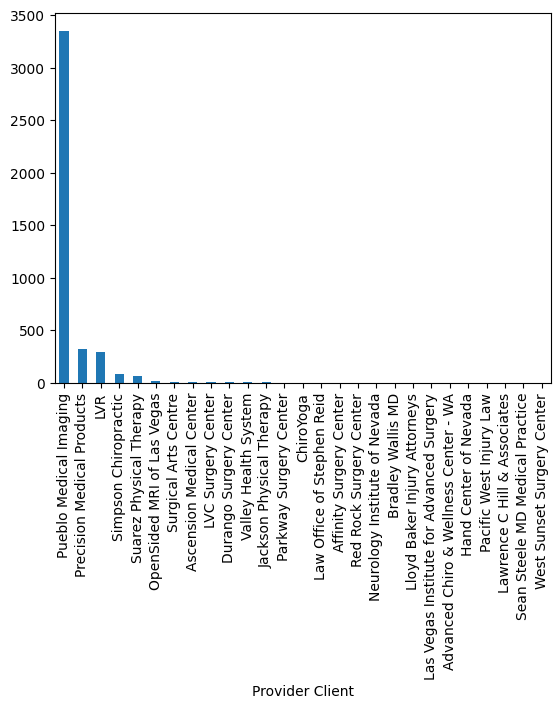

In [1061]:
df['Provider Client'].value_counts().plot(kind='bar')

<Axes: xlabel='Subject'>

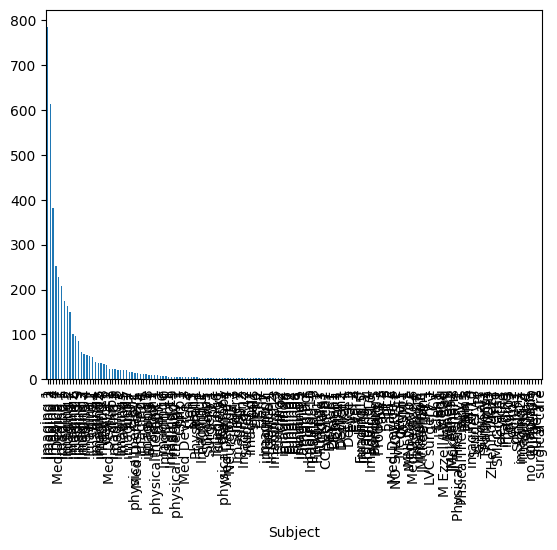

In [1062]:
df['Subject'].value_counts().plot(kind='bar')

In [1063]:
# print(df['Subject'].unique())
print(list(df['Subject'].unique()))

['Med Device 1', 'SMcGrath1', 'SChuen1', 'CChuench1', 'Lien1', 'Lien2', 'imaging 1', 'imaging 2', 'imaging 3', 'imaging1', 'imaging2', 'pain1', 'imaging3', 'Imaging1', 'Imaging2', 'Imaging 1', 'Imaging 2', 'Imaging 3', 'Imaging 5', 'Imaging 4', 'Pain 1', 'Surgery1', 'Imaging 1 ', 'Surgery', 'Imaging 6', 'imaging4', 'Imaging  2', 'Imaging  3', 'pt1', 'PT1', 'PT 1', 'Physical 1', 'physicaltherapy 1', 'PT 2', 'PT 3', 'surgery1', 'SPT 1', 'Med Device 2', 'pain 1', 'device1', 'physicaltherapy1', 'chiro 1', 'chiro1', 'Product 1', 'Med Device 3', 'Med Device 4', 'Med Device 1 ', 'device2', 'Product 2', 'imaging5', 'imaging6', 'Chiro 1', 'Pain1', 'Pain2', 'Pain 4', 'Pain 5', 'Imaging3', 'Imaging4', 'eval1', 'Imaging 7', 'Imaging 8', 'Imaging 9', 'imaging 10', 'Imaging 11', 'Imaging 12', 'imaging 1 ', 'surgical care', 'imaging 4', 'imaging 5', 'imaging 6', 'JPT 1', 'Funding1', 'Funding2', 'pt 1', 'LVC surgery 1', 'CKlein1', 'JMckeehan1', 'JMckeehan2', 'JMckeehan3', 'MInes1', 'MInes2', 'MNavarro

<Axes: xlabel='Funding Status'>

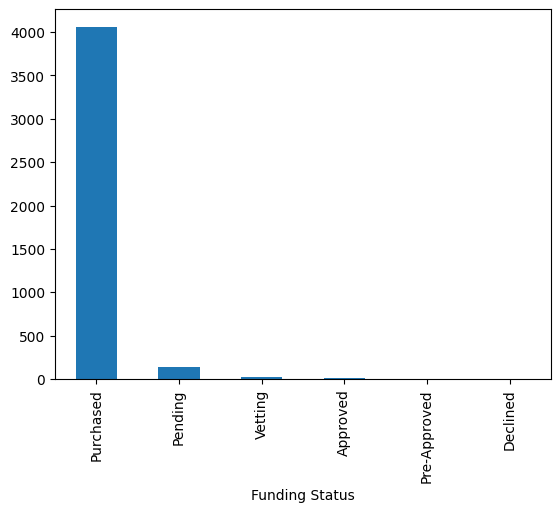

In [1064]:
df['Funding Status'].value_counts().plot(kind='bar')

<Axes: >

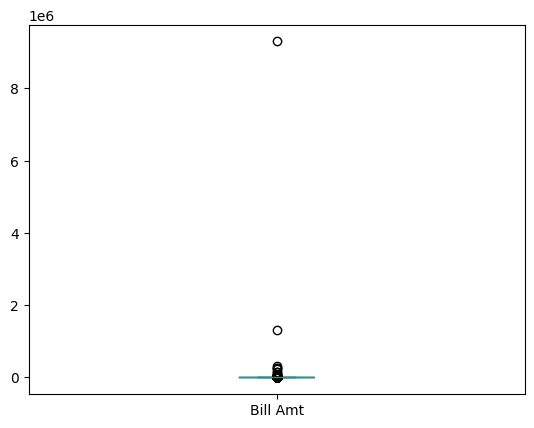

In [1065]:
df['Bill Amt'].plot(kind='box')

<Axes: >

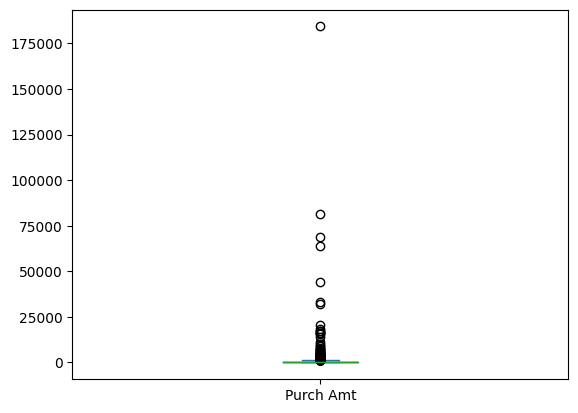

In [1066]:
df['Purch Amt'].plot(kind='box')

<Axes: >

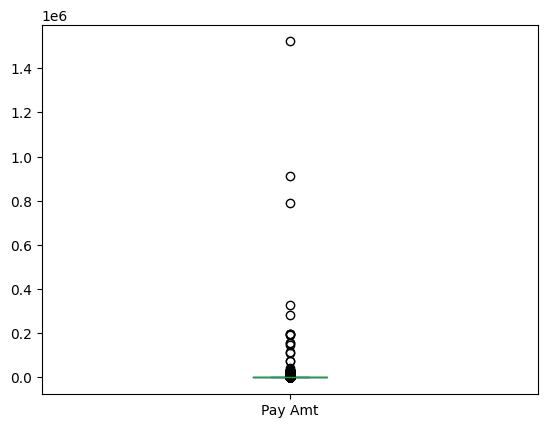

In [1067]:
df['Pay Amt'].plot(kind='box')

# ***4. Limpeza de datos y atípicos por errores***

### ***Eliminación de procesos aún no terminados para el análisis de ROI de los terminados***

In [1068]:
df['Funding Status'].unique()

['Purchased', 'Pre-Approved', 'Pending', 'Approved', 'Vetting', NaN, 'Declined']
Categories (6, object): ['Approved', 'Declined', 'Pending', 'Pre-Approved', 'Purchased', 'Vetting']

In [1069]:
# Se eliminan los registros que hayan sido declined porque no se tiene información completa de ellos y los que nos importa analizar son los comparados

indices_a_eliminar = df[df['Funding Status'] != 'Purchased'].index

# Eliminar esas filas usando drop(axis=0)
df.drop(indices_a_eliminar, axis=0, inplace=True)

In [1070]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4058 entries, 26 to 8271
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     4058 non-null   category
 1   Provider Client  4048 non-null   category
 2   Subject          4058 non-null   category
 3   Bill Amt         4057 non-null   float64 
 4   Purch Amt        4057 non-null   float64 
 5   Pay Amt          4051 non-null   float64 
 6   Funding Status   4058 non-null   category
dtypes: category(4), float64(3)
memory usage: 167.6 KB


In [1071]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,Funding Status
26,A&T Legal Group,Precision Medical Products,Med Device 1,4250.0,1190.00,750.0,Purchased
28,Aaron Law Group,Precision Medical Products,Med Device 1,4250.0,1360.00,2762.5,Purchased
39,Accident Fighters APC,Precision Medical Products,Med Device 1,4250.0,1062.50,2125.0,Purchased
40,Accident Lawyers Group Pros,Precision Medical Products,Med Device 1,4250.0,1190.00,1262.0,Purchased
41,Ace Law Firm - California,Precision Medical Products,Med Device 1,995.0,248.75,398.0,Purchased


<Axes: xlabel='Funding Status'>

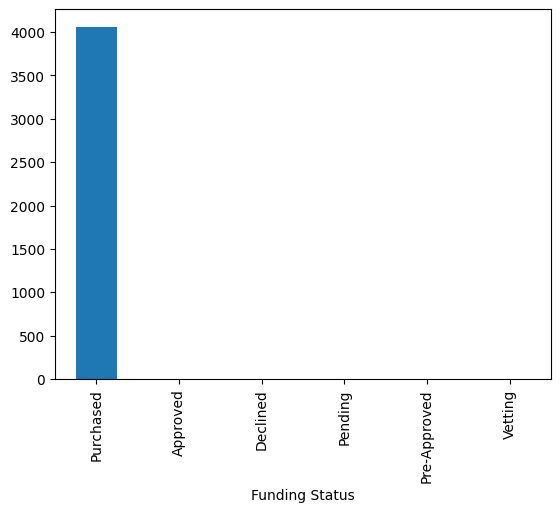

In [1072]:
df['Funding Status'].value_counts().plot(kind='bar')

In [1073]:
# Como todos los datos pertenecen a la cateoría Purchased de Funding Status entonces eliminamos esta variable por ser redundante
df = df.drop('Funding Status', axis=1)

### ***Existen procesos que a pesar de haber sido comprados aún no se han terminado porque están a la espera de que el abogado pague (Pay amt = nan) por lo que estos registros no se pueden utilizar porque Pay amt es nuestra variable objetivo***

In [1074]:
# Se eliminan  los registros donde Pay amt sea nula

df = df.dropna(subset=['Pay Amt'])

In [1075]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4051 entries, 26 to 8271
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     4051 non-null   category
 1   Provider Client  4041 non-null   category
 2   Subject          4051 non-null   category
 3   Bill Amt         4050 non-null   float64 
 4   Purch Amt        4050 non-null   float64 
 5   Pay Amt          4051 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 163.2 KB


In [1076]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt
26,A&T Legal Group,Precision Medical Products,Med Device 1,4250.0,1190.00,750.0
28,Aaron Law Group,Precision Medical Products,Med Device 1,4250.0,1360.00,2762.5
39,Accident Fighters APC,Precision Medical Products,Med Device 1,4250.0,1062.50,2125.0
40,Accident Lawyers Group Pros,Precision Medical Products,Med Device 1,4250.0,1190.00,1262.0
41,Ace Law Firm - California,Precision Medical Products,Med Device 1,995.0,248.75,398.0


### ***Limpieza de errores en los datos y unificación de categorías válidas mediante uso de expresiones regulares***

In [1077]:
df['Subject'].unique()

['Med Device 1', 'SMcGrath1', 'SChuen1', 'CChuench1', 'Lien1', ..., 'ortho 1', 'Eval 1', 'Eval 2', 'Eval 3', 'Eval 4']
Length: 170
Categories (176, object): ['CChuench1', 'CKlein1', 'Chiro 1', 'Chiro1', ..., 'surgery 1', 'surgery 2', 'surgery1', 'surgical care']

<Axes: xlabel='Subject'>

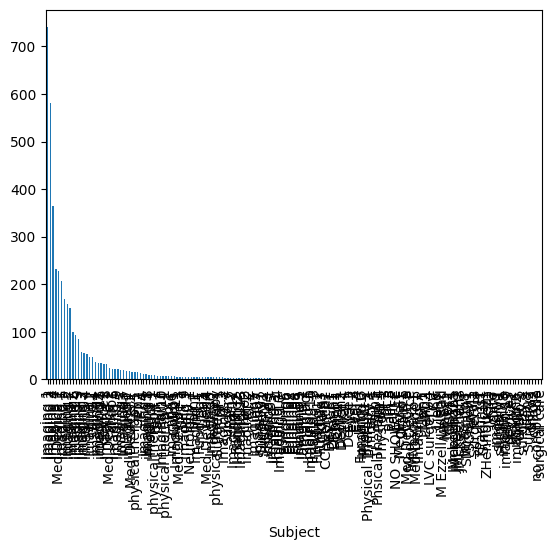

In [1078]:
df['Subject'].value_counts().plot(kind='bar')

In [1079]:
df['Subject'] = (
    df['Subject']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True)        # espacios múltiples a uno
    .str.replace(r'[^\w\s]', ' ', regex=True)    # caracteres especiales a espacio
    .str.replace(r'\s+', ' ', regex=True)        # limpiar espacios de nuevo
    .str.strip()                                  # eliminar espacios inicio/fin
    .str.replace(r'\d+', '', regex=True)         # eliminar números (imaging1 → imaging)
    .str.strip()                                  # limpiar espacios finales
)
# Creación de columna de limpieza
df['Subject_Clean'] = np.nan

In [1080]:
# Definir mapeo de agrupación
mapeo = {
    r'^(?:imaging|iamging|imagine|imagin|imagiong|imag)': 'Imaging',
    r'^(?:surg|surgical|lcv|lvc|surgical\s*care)': 'Surgery',
    r'^(?:med\s*dev|device|decive|product|mec\s*device|medprod)': 'Medical Device',
    r'^(?:pt|spt|jpt|physical|phsicaltherapy|phystherapy)': 'Physical Therapy',
    r'^(?:chiro|ad\s*chiro)': 'Chiropractic',
    r'^pain': 'Pain Management',
    r'^(?:neuro|neurology)': 'Neurology',
    r'^(?:eval|medeval|consult)': 'Evaluation',
    r'^primary': 'Primary Care',
    r'^lab': 'Laboratory',
    r'^ortho': 'Orthopedics',
    r'^lien': 'Lien',
    r'^pharmacy': 'Pharmacy',
    r'^(?:psych)': 'Psychiatry',
    r'^er$': 'Emergency Room',
    r'^amnio': 'Amniocentesis',
    r'^(?:funding|void|osm|oms|sac|has|adc|no\s*show|loan|test)': 'Administrative',
    r'^procedure': 'Medical Procedure'
}

for pattern, category in mapeo.items():
    mask = df['Subject'].str.contains(pattern, regex=True, na=False)
    df.loc[mask, 'Subject_Clean'] = category

print(f"\nCategorización por patrones completada")
print(f"Registros categorizados: {df['Subject_Clean'].notna().sum()}")
print(f"Registros sin categorizar: {df['Subject_Clean'].isna().sum()}")

uncategorized = df[df['Subject_Clean'].isna()]['Subject'].unique()

# if len(uncategorized) > 0:
#     print(f"\nVALORES NO CATEGORIZADOS ({len(uncategorized)}):")
#     print("Estos serán eliminados del análisis:")
#     for val in sorted(uncategorized)[:30]:
#         count = (df['Subject'] == val).sum()
#         print(f"   - '{val}' (n={count})")
#     if len(uncategorized) > 30:
#         print(f"   ... y {len(uncategorized) - 30} más")

# Reemplazamos los datos de Subject por los limpiados
df['Subject'] = df['Subject_Clean']
df = df.drop('Subject_Clean', axis=1)



Categorización por patrones completada
Registros categorizados: 4034
Registros sin categorizar: 17


/tmp/ipykernel_13363/3376970377.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Imaging' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'Subject_Clean'] = category


In [1081]:
uncategorized

array(['smcgrath', 'schuen', 'cchuench', 'cklein', 'jmckeehan', 'mines',
       'mnavarro', 'dmarin', 'zhenriquez', 'dshieh', 'm ezzell lv rad',
       'tparhms', 'lteng'], dtype=object)

In [1082]:
df['Subject'].unique()

array(['Medical Device', nan, 'Lien', 'Imaging', 'Pain Management',
       'Surgery', 'Physical Therapy', 'Chiropractic', 'Administrative',
       'Evaluation', 'Neurology', 'Orthopedics', 'Primary Care'],
      dtype=object)

In [1083]:
df['Subject'].value_counts()

Subject
Imaging             3428
Medical Device       330
Chiropractic          78
Physical Therapy      71
Lien                  46
Pain Management       32
Surgery               18
Administrative        18
Evaluation             6
Neurology              4
Orthopedics            2
Primary Care           1
Name: count, dtype: int64

In [1084]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4051 entries, 26 to 8271
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     4051 non-null   category
 1   Provider Client  4041 non-null   category
 2   Subject          4034 non-null   object  
 3   Bill Amt         4050 non-null   float64 
 4   Purch Amt        4050 non-null   float64 
 5   Pay Amt          4051 non-null   float64 
dtypes: category(2), float64(3), object(1)
memory usage: 181.4+ KB


### ***Organización de categorías de Account Name***

In [1085]:
print(list(df['Account Name'].unique()))

['A&T Legal Group', 'Aaron Law Group', 'Accident Fighters APC', 'Accident Lawyers Group Pros', 'Ace Law Firm - California', 'Ace Law Group', 'ACTS Law Firm', 'Adamson Ahdoot LLP', 'Agwara Law', 'Alexandroff Law Group', 'Allen Injury Law LLC', 'Allison Law Firm', 'Angulo Law Group', 'Anthony Paglia', 'Ashton & Price LLP', 'Atkinson Watkins & Hoffman Attorneys', 'Avery Injury Law ', 'Avrek Law', 'Ayala Morgan & Buzzard', 'BANAFSHE LAW FIRM PC', 'Baradat & Paboojian', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Berg Law - California', 'Bertoldo Carter Smith & Mullen Attorneys', 'Beverly Law', 'Bighorn Law - Las Vegas', 'Blackburn Wirth Injury Team', 'Boley & Aldabbagh Attorneys', 'Bonakdar Law Firm', 'Boohoff Law', 'Bruning Law Firm', 'Burger Law', 'Burris & Thomas Law', 'Caffey Law Firm', 'California Accident Law Firm LOP', 'Call Jacob - The Law Offices of Jacob Emrani', 'Cardenas Law Group', 'Carpenter & Zuckerman', 'CARTER WOLDEN CURTIS LLP', 'CEGA Law Group',

In [1086]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4051 entries, 26 to 8271
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     4051 non-null   category
 1   Provider Client  4041 non-null   category
 2   Subject          4034 non-null   object  
 3   Bill Amt         4050 non-null   float64 
 4   Purch Amt        4050 non-null   float64 
 5   Pay Amt          4051 non-null   float64 
dtypes: category(2), float64(3), object(1)
memory usage: 181.4+ KB


In [1087]:
df['Account Name'] = (
    df['Account Name']
    .astype(str)
    .str.strip()
    # .str.lower()
    .str.replace(r'\s+', ' ', regex=True)          # Espacios múltiples → uno
    .str.replace(r'[^\w\s&]', '', regex=True)      # Eliminar símbolos raros (excepto &)
    .str.strip()
)
# Creación de columna de limpieza
df['AccountName_Clean'] = np.nan

In [1088]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4051 entries, 26 to 8271
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Account Name       4051 non-null   object  
 1   Provider Client    4041 non-null   category
 2   Subject            4034 non-null   object  
 3   Bill Amt           4050 non-null   float64 
 4   Purch Amt          4050 non-null   float64 
 5   Pay Amt            4051 non-null   float64 
 6   AccountName_Clean  0 non-null      float64 
dtypes: category(1), float64(4), object(2)
memory usage: 226.8+ KB


In [1089]:
unique_clean = []

from rapidfuzz import fuzz

for firm in df['Account Name'].unique():
    clean = firm.strip()
    match_found = False
    for ref in unique_clean:
        if fuzz.ratio(clean, ref) > 80:   # Umbral de similitud
            match_found = True
            df.loc[df['Account Name'] == firm, 'AccountName_Clean'] = ref
            break
    if not match_found:
        unique_clean.append(clean)
        df.loc[df['Account Name'] == firm, 'AccountName_Clean'] = clean

/tmp/ipykernel_13363/3216805034.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A&T Legal Group' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Account Name'] == firm, 'AccountName_Clean'] = clean


In [1090]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4051 entries, 26 to 8271
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Account Name       4051 non-null   object  
 1   Provider Client    4041 non-null   category
 2   Subject            4034 non-null   object  
 3   Bill Amt           4050 non-null   float64 
 4   Purch Amt          4050 non-null   float64 
 5   Pay Amt            4051 non-null   float64 
 6   AccountName_Clean  4051 non-null   object  
dtypes: category(1), float64(3), object(3)
memory usage: 226.8+ KB


In [1091]:
# --- Reemplazar columna original por la limpia ---
df['Account Name'] = df['AccountName_Clean']
df = df.drop('AccountName_Clean', axis=1)

print(list(df['Account Name'].unique()))

['A&T Legal Group', 'Aaron Law Group', 'Accident Fighters APC', 'Accident Lawyers Group Pros', 'Ace Law Firm  California', 'Ace Law Group', 'ACTS Law Firm', 'Adamson Ahdoot LLP', 'Agwara Law', 'Alexandroff Law Group', 'Allen Injury Law LLC', 'Allison Law Firm', 'Angulo Law Group', 'Anthony Paglia', 'Ashton & Price LLP', 'Atkinson Watkins & Hoffman Attorneys', 'Avery Injury Law', 'Avrek Law', 'Ayala Morgan & Buzzard', 'BANAFSHE LAW FIRM PC', 'Baradat & Paboojian', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Berg Law  California', 'Bertoldo Carter Smith & Mullen Attorneys', 'Beverly Law', 'Bighorn Law  Las Vegas', 'Blackburn Wirth Injury Team', 'Boley & Aldabbagh Attorneys', 'Bonakdar Law Firm', 'Boohoff Law', 'Bruning Law Firm', 'Burger Law', 'Burris & Thomas Law', 'Caffey Law Firm', 'California Accident Law Firm LOP', 'Call Jacob  The Law Offices of Jacob Emrani', 'Cardenas Law Group', 'Carpenter & Zuckerman', 'CARTER WOLDEN CURTIS LLP', 'Christiansen Trial La

In [1092]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4051 entries, 26 to 8271
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     4051 non-null   object  
 1   Provider Client  4041 non-null   category
 2   Subject          4034 non-null   object  
 3   Bill Amt         4050 non-null   float64 
 4   Purch Amt        4050 non-null   float64 
 5   Pay Amt          4051 non-null   float64 
dtypes: category(1), float64(3), object(2)
memory usage: 195.1+ KB


In [1093]:
df[~((df['Account Name'].map(df['Account Name'].value_counts()) < 2) & (df['Pay Amt'].isna()))]
print(list(df['Account Name'].unique()))

['A&T Legal Group', 'Aaron Law Group', 'Accident Fighters APC', 'Accident Lawyers Group Pros', 'Ace Law Firm  California', 'Ace Law Group', 'ACTS Law Firm', 'Adamson Ahdoot LLP', 'Agwara Law', 'Alexandroff Law Group', 'Allen Injury Law LLC', 'Allison Law Firm', 'Angulo Law Group', 'Anthony Paglia', 'Ashton & Price LLP', 'Atkinson Watkins & Hoffman Attorneys', 'Avery Injury Law', 'Avrek Law', 'Ayala Morgan & Buzzard', 'BANAFSHE LAW FIRM PC', 'Baradat & Paboojian', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Berg Law  California', 'Bertoldo Carter Smith & Mullen Attorneys', 'Beverly Law', 'Bighorn Law  Las Vegas', 'Blackburn Wirth Injury Team', 'Boley & Aldabbagh Attorneys', 'Bonakdar Law Firm', 'Boohoff Law', 'Bruning Law Firm', 'Burger Law', 'Burris & Thomas Law', 'Caffey Law Firm', 'California Accident Law Firm LOP', 'Call Jacob  The Law Offices of Jacob Emrani', 'Cardenas Law Group', 'Carpenter & Zuckerman', 'CARTER WOLDEN CURTIS LLP', 'Christiansen Trial La

In [1094]:
df = df[df['Account Name'].map(df['Account Name'].value_counts()) > 2]
print(list(df['Account Name'].unique()))


['Ace Law Group', 'Adamson Ahdoot LLP', 'Agwara Law', 'Allen Injury Law LLC', 'Angulo Law Group', 'Atkinson Watkins & Hoffman Attorneys', 'Ayala Morgan & Buzzard', 'BANAFSHE LAW FIRM PC', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Berg Law  California', 'Beverly Law', 'Bighorn Law  Las Vegas', 'Blackburn Wirth Injury Team', 'Bruning Law Firm', 'Burris & Thomas Law', 'Cardenas Law Group', 'Carpenter & Zuckerman', 'Compass Law Group', 'Connell Law', 'David W Fassett Personal Injury Law', 'Dias Hall Law', 'Dimopoulos Injury Law', 'Downtown LA Law Group', 'ER Injury Attorneys', 'Farahi Law Firm', 'Fuller Law Practice', 'G Dallas Horton & Associates', 'Garg Golden Law Firm', 'Gina Corena Law', 'Goldberg Injury Law', 'Hale Injury Law', 'Harris Personal Injury Lawyers  CA', 'Jacoby & Meyers  CA', 'Kang & Associates', 'Karns & Karns Law Firm', 'Ladah Law', 'Lalezary Law Firm  CA Law Brothers', 'Larian Law Firm', 'Larry H Parker Law', 'Law Office of Arash Khorsandi', 

In [1095]:
len(list(df['Account Name'].unique()))
# Quedaron un total de 251 categorías

84

In [1096]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3848 entries, 42 to 8231
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3848 non-null   object  
 1   Provider Client  3838 non-null   category
 2   Subject          3831 non-null   object  
 3   Bill Amt         3847 non-null   float64 
 4   Purch Amt        3847 non-null   float64 
 5   Pay Amt          3848 non-null   float64 
dtypes: category(1), float64(3), object(2)
memory usage: 185.4+ KB


### ***Organización de categorías de Provider Client***
**Para esta variable todas las categorías coinciden con las variables válidas en el negocio**

In [1097]:
print(list(df['Provider Client'].unique()))

['Pueblo Medical Imaging', 'LVR', 'Durango Surgery Center', 'Valley Health System', 'Parkway Surgery Center', 'West Sunset Surgery Center', 'Suarez Physical Therapy', 'Jackson Physical Therapy', 'Precision Medical Products', 'Ascension Medical Center', 'Simpson Chiropractic', 'Law Office of Stephen Reid', 'Surgical Arts Centre', 'OpenSided MRI of Las Vegas', 'LVC Surgery Center', 'Sean Steele MD Medical Practice', 'Red Rock Surgery Center', nan, 'Affinity Surgery Center', 'Hand Center of Nevada', 'Lawrence C Hill & Associates', 'Lloyd Baker Injury Attorneys', 'Neurology Institute of Nevada', 'Bradley Wallis MD', 'Pacific West Injury Law']


In [1098]:
len(list(df['Provider Client'].unique()))

25

# ***5. Limpieza de datos nulos: Imputación***

Estrategia:
* Eliminar registros con mas de 15% de nulos
* Eliminar columnas con mas de 15%-20% de nulos
* Imputar por media, moda, mediana, vecinos cercanos. No se puede imputar más allá del 15% de los datos.
* Para casos especiales se crea modelo predictivo

In [1099]:
#Corrección del tipo de datos object a categorías
categorical_columns = ['Account Name', 'Subject','Provider Client']
df[categorical_columns] = df[categorical_columns].astype('category')

In [1100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3848 entries, 42 to 8231
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3848 non-null   category
 1   Provider Client  3838 non-null   category
 2   Subject          3831 non-null   category
 3   Bill Amt         3847 non-null   float64 
 4   Purch Amt        3847 non-null   float64 
 5   Pay Amt          3848 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 135.9 KB


In [1101]:
#Limpieza de datos nulos: Imputación por la media y moda
from sklearn.impute import SimpleImputer

#Imputacion de variables numéricas: media
var_numericas = ['Bill Amt','Purch Amt']
ImpNumeros = SimpleImputer(missing_values=np.nan, strategy='mean')
df[var_numericas] = ImpNumeros.fit_transform(df[var_numericas])

#Imputacion de variables categóricas: moda
var_categoricas = ['Provider Client','Subject']
ImpCategorias = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[var_categoricas] = ImpCategorias.fit_transform(df[var_categoricas])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3848 entries, 42 to 8231
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3848 non-null   category
 1   Provider Client  3848 non-null   object  
 2   Subject          3848 non-null   object  
 3   Bill Amt         3848 non-null   float64 
 4   Purch Amt        3848 non-null   float64 
 5   Pay Amt          3848 non-null   float64 
dtypes: category(1), float64(3), object(2)
memory usage: 186.8+ KB


In [1102]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt
42,Ace Law Group,Pueblo Medical Imaging,Imaging,1650.0,462.0,907.5
43,Ace Law Group,Pueblo Medical Imaging,Imaging,1650.0,462.0,940.5
44,Ace Law Group,Pueblo Medical Imaging,Imaging,1650.0,462.0,990.0
45,Ace Law Group,Pueblo Medical Imaging,Lien,1650.0,462.0,825.0
46,Ace Law Group,Pueblo Medical Imaging,Lien,1650.0,462.0,825.0


In [1103]:
df.to_csv('data_cleaned.csv')